<a href="https://colab.research.google.com/github/samuelj1323/ML_Learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pytorch workflow

Let's explore an example pytorch end to end flow.

Resources:
* Ground truth notebook https://github.com/mrdbourke/pytorch-deep-learning
* Book version: https://www.learnpytorch.io/01_pytorch_workflow/



In [1]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it al together"
}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for Neural networks
import matplotlib.pyplot as plt

#Check pytorch version
torch.__version__

'2.1.0+cu118'

# 1. Data (preparing and loading )
Data can be almost anything ... in machine learning
* excel spreadsheet
* Images
* Videos (youtube has lots of data.. )
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns int that numerical representation.

To showcase this, let's create some *known* using the linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets (one of the most important concepts in ML in general)

Let's create a training and test set with our data

In [4]:
# Create a train / test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split: ], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

how might we better visualize our data?

This is where the data explorer's moto comes in!

"VISUALIZE, VISUALIZE, VISUALIZE"

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """Plots training data, test data and compares predicitons"""
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # Show the legend
  plt.legend(prop={"size": 14})


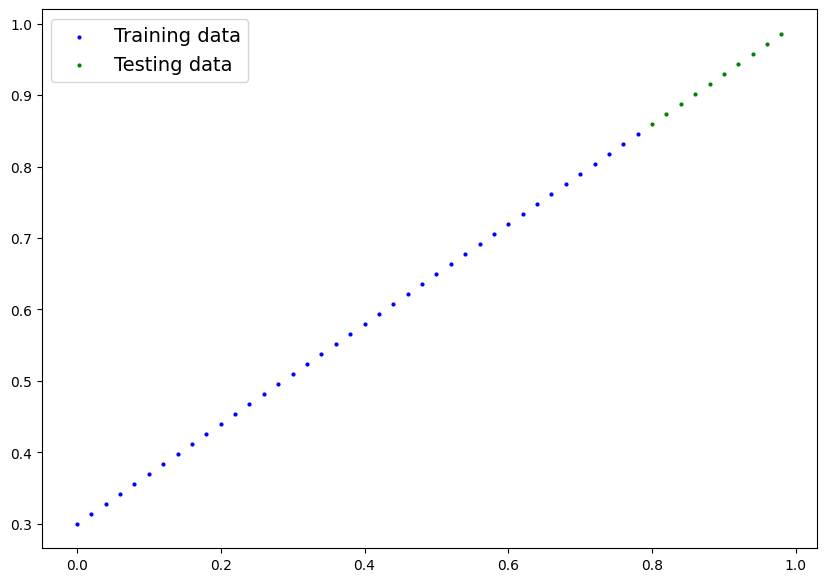

In [6]:
plot_predictions();

## Building our first pytorch model

our first pytorch model

What our model does:
* Start with random values (weight, bias)
* Look at training data and adjust the random values to better represent the ideal values (The weight & bias we used to create the data)

How does it do so?
Through 2 main algs:
1. Gradient descent
2. Backpropagation

In [7]:
from torch import nn
# Create a linear regression model class
class LinearRegressionModel(nn.Module): #<= almost everything in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    #Forward method to define the computation in the model
    #Any subclass of nn.Module needs to override the forward()
  def forward(self, x: torch.Tensor) -> torch.Tensor: #<- "x" is the input data.
    return self.weights * x + self.bias #This is the linear regression formula.



from torch.fx.experimental.symbolic_shapes import method_to_operator
### Pytorch model building essentials

 * torch.nn - contains all the building blocks for computational graphs (neural network)
 * torch.nn.Parameter - what parameters should your model try and learn, often a pytorch layer from torch.nn will set these for us.
 * torch.nn.Module - The base class for all neural network modules. If you subclass it, you should overwrite the forward method
 * torch.optim - This is where the optimizers in pytorch live, they'll help with gradient descent
 * def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

### To get data ready the most important modules are:
* torchvision.transforms
* torch.utils.data.Dataset
* torch.utils.data.DataLoader

### Checking the contents of our pytorch model

now we've created a model, let's see what is inside.

So we can check our model parameters or what's inside our model using `.parameters()`

In [8]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of NN.module)
model_0 = LinearRegressionModel()
#Check out the paramters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
weight, bias

(0.7, 0.3)

### making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how ell it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward` method


In [11]:
#make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

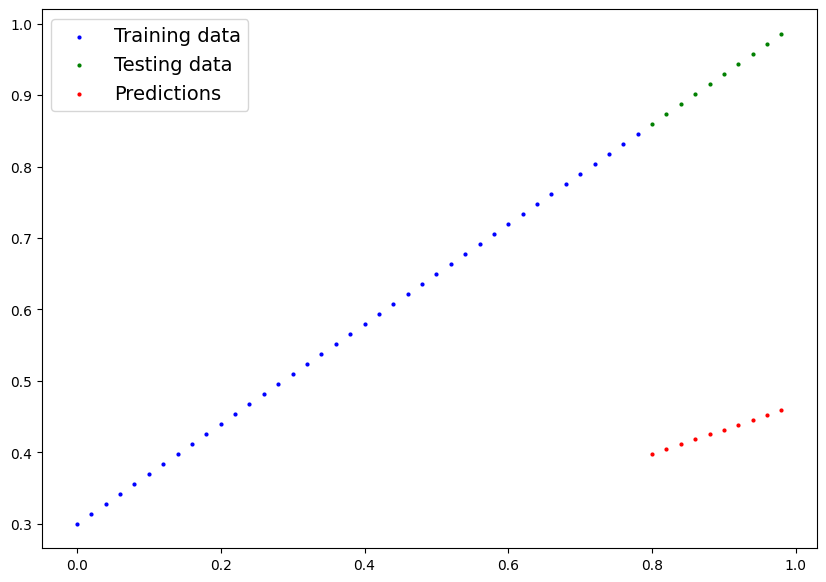

In [13]:
plot_predictions(predictions=y_preds)

## 3. Train model
The whole idea of training is for a model to move from some *unknown* (these may be random) to some *known* Parameters

or from some poor representation of the date to a better representation of the data

One way to measure how poor or how wrong your models predictions are is to use a loss function.

You might see a loss function refered to as a criterion, or cost function

Things we need to train:


* **Loss function** IS a function to measure how wrong your model's predictions are to the ideal outputs. lower is better
* **Optimizer:** Takes into account the loss of a model and adjusts the model's paramters
* **training/testing loop**  

In [14]:
 # set up a loss function

loss_fn = nn.L1Loss()
 #setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.005)

### Building a training and testing loop in pytorch

A couple of things we need in a training loop:
0. Loop through the data
1. forward pass (this involves data moving through our models forward functions)
2. Calculate the loss
3. Optimizer Zerio grad
4. Loss backward
5. Optimizer step

In [15]:
# an epoch is one loop through the data....
torch.manual_seed(42)
epochs = 500

#Track different values
epoch_count = []
loss_values = []
test_loss_values =[]
### Training
# 0. loop through the data
for epoch in range(epochs):
  # Set the model to training mode.
  model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients.
  # 1. Forward Pass
  y_pred = model_0(X_train)
  # 2. Calculate teh loss
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Perform back propagation on the loss w/ respect to the parameters of the model.
  loss.backward()
  # 5. Step the optimizer(perform gradient descent)
  optimizer.step() #by default how the optimizer changes will accumulate through the loop so... we have to zero theme above in step 3
  ### Testing
  model_0.eval() # turns off different settings in the model not needed for eval/ testing (dropout/ batch norm layers)
  with torch.inference_mode():# turns off gradient tracking
    #1. Do the forward pass
    test_pred = model_0(X_test)
    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    #Printout what's happening
    if epoch % 50 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
      print(f"State Dict: {model_0.state_dict()}")


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.4878006875514984
State Dict: OrderedDict([('weights', tensor([0.3386])), ('bias', tensor([0.1338]))])
Epoch: 50 | Loss: 0.06430868804454803 | Test loss: 0.1780700981616974
State Dict: OrderedDict([('weights', tensor([0.4344])), ('bias', tensor([0.3583]))])
Epoch: 100 | Loss: 0.041651852428913116 | Test loss: 0.10024197399616241
State Dict: OrderedDict([('weights', tensor([0.4929])), ('bias', tensor([0.3841]))])
Epoch: 150 | Loss: 0.03300347551703453 | Test loss: 0.07681445777416229
State Dict: OrderedDict([('weights', tensor([0.5367])), ('bias', tensor([0.3686]))])
Epoch: 200 | Loss: 0.024415848776698112 | Test loss: 0.056821130216121674
State Dict: OrderedDict([('weights', tensor([0.5793])), ('bias', tensor([0.3506]))])
Epoch: 250 | Loss: 0.01582920365035534 | Test loss: 0.036484431475400925
State Dict: OrderedDict([('weights', tensor([0.6221])), ('bias', tensor([0.3328]))])
Epoch: 300 | Loss: 0.007245116867125034 | Test loss: 0.0164

In [16]:
import numpy as np

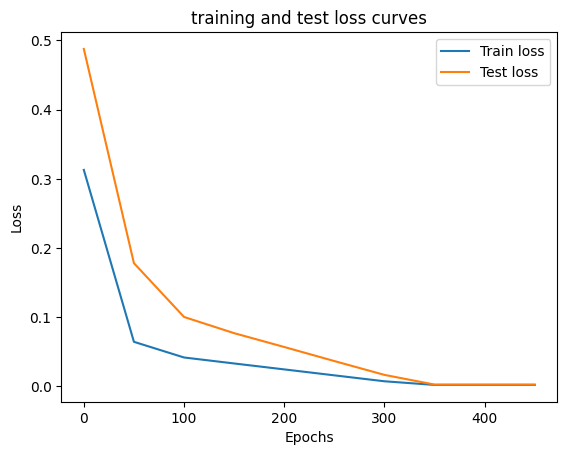

In [17]:
#Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [18]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6954])), ('bias', tensor([0.2998]))])

In [20]:
weight, bias

(0.7, 0.3)

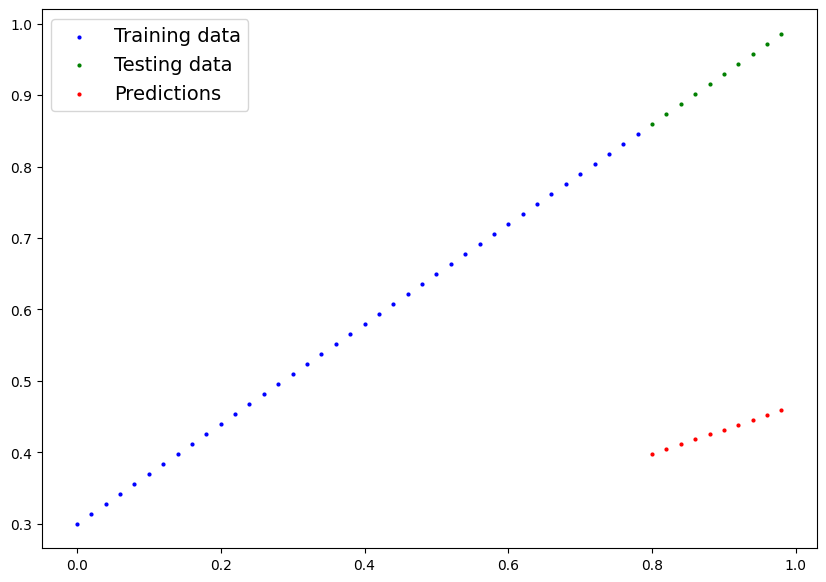

In [21]:
plot_predictions(predictions=y_preds)

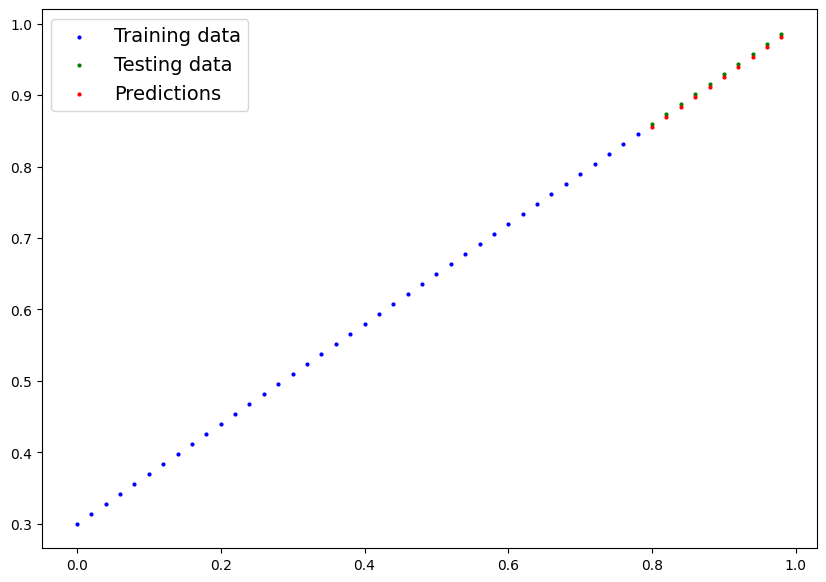

In [22]:
plot_predictions(predictions=y_preds_new)

### Saving a model in pytorch
Three main methods:
1. `torch.save()` - allows you to save in python pickle format
2. `torch.load()` -- allows you to load a mdoel
3. `torch.nn.Module.load_state_dict()`- allows you to load a model's state dictionary.

In [25]:
from pathlib import Path
# create model dir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
# 2. Create model save path
MODEL_NAME = "01_python_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH
#3. save the model state dict
print(f"saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

saving model to models/01_python_workflow_model_0.pth


In [26]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1674 Dec  2 22:41 01_python_workflow_model_0.pth


In [28]:
# Load in saved  state dict we need new instance of model class


loaded_model_0 = LinearRegressionModel()
# Load the saved state dict of model_0

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [30]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6954])), ('bias', tensor([0.2998]))])

In [31]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8561],
        [0.8701],
        [0.8840],
        [0.8979],
        [0.9118],
        [0.9257],
        [0.9396],
        [0.9535],
        [0.9674],
        [0.9813]])

In [33]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8561],
        [0.8701],
        [0.8840],
        [0.8979],
        [0.9118],
        [0.9257],
        [0.9396],
        [0.9535],
        [0.9674],
        [0.9813]])